In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'p.a. bolzano'

path_data = f'{path_root}/data'
path_img_root = f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,21,P.A. Bolzano,1,0,1,0,1,1,1,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,21,P.A. Bolzano,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,21,P.A. Bolzano,1,0,1,0,1,0,0,...,0.0,1.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,21,P.A. Bolzano,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,21,P.A. Bolzano,1,0,1,0,1,0,0,...,0.0,14.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,2021-03-16T17:00:00,21,P.A. Bolzano,154,33,187,3599,3786,-147,175,...,8.0,14967.0,258.0,-142.0,17.65,4.94,1.17,67.83,0.00,-3.74
386,2021-03-17T17:00:00,21,P.A. Bolzano,141,33,174,3540,3714,-72,158,...,2.0,12433.0,347.0,-59.0,18.97,4.68,1.27,45.53,0.00,-1.90
387,2021-03-18T17:00:00,21,P.A. Bolzano,135,31,166,3491,3657,-57,165,...,7.0,11355.0,311.0,-49.0,18.67,4.54,1.45,53.05,-6.06,-1.53
388,2021-03-19T17:00:00,21,P.A. Bolzano,122,32,154,3331,3485,-172,127,...,0.0,11582.0,212.0,-160.0,20.78,4.42,1.10,59.91,3.23,-4.70


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 20, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 116
Nuovi tamponi: 11452.0
Percentuale nuovi positivi/nuovi tamponi: 1.0 %
Nuovi guariti: 186.0
Nuovi deceduti: 2.0
Variazione positivi ricoverati con sintomi: -1.0
Variazione positivi in terapia intensiva: 0.0
Variazione positivi in isolamento dimiciliare: 33.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 20, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-19T17:00:00,21,P.A. Bolzano,212,30,242,12224,12466,353,436,...,9.0,7398.0,317.0,355.0,12.40,1.94,5.89,137.54,0.00,2.91
1,2021-01-20T17:00:00,21,P.A. Bolzano,218,30,248,12284,12532,66,441,...,4.0,7854.0,615.0,60.0,12.10,1.98,5.61,71.71,0.00,0.53
2,2021-01-21T17:00:00,21,P.A. Bolzano,226,28,254,12569,12823,291,566,...,7.0,7636.0,808.0,285.0,11.02,1.98,7.41,70.05,-6.67,2.32
3,2021-01-22T17:00:00,21,P.A. Bolzano,227,24,251,12790,13041,218,510,...,3.0,6836.0,520.0,221.0,9.56,1.92,7.46,98.08,-14.29,1.70
4,2021-01-23T17:00:00,21,P.A. Bolzano,219,24,243,13143,13386,345,552,...,3.0,7972.0,750.0,353.0,9.88,1.82,6.92,73.60,0.00,2.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-03-16T17:00:00,21,P.A. Bolzano,154,33,187,3599,3786,-147,175,...,8.0,14967.0,258.0,-142.0,17.65,4.94,1.17,67.83,0.00,-3.74
57,2021-03-17T17:00:00,21,P.A. Bolzano,141,33,174,3540,3714,-72,158,...,2.0,12433.0,347.0,-59.0,18.97,4.68,1.27,45.53,0.00,-1.90
58,2021-03-18T17:00:00,21,P.A. Bolzano,135,31,166,3491,3657,-57,165,...,7.0,11355.0,311.0,-49.0,18.67,4.54,1.45,53.05,-6.06,-1.53
59,2021-03-19T17:00:00,21,P.A. Bolzano,122,32,154,3331,3485,-172,127,...,0.0,11582.0,212.0,-160.0,20.78,4.42,1.10,59.91,3.23,-4.70


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

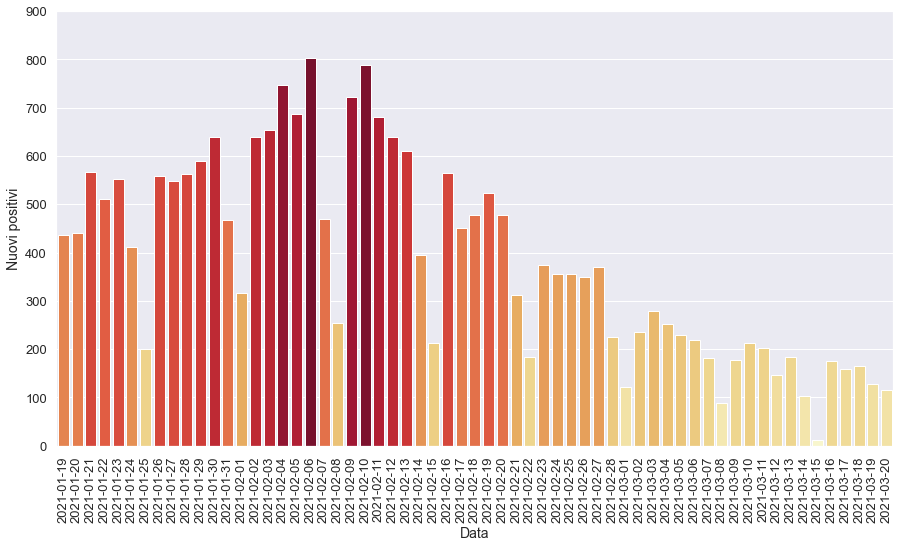

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

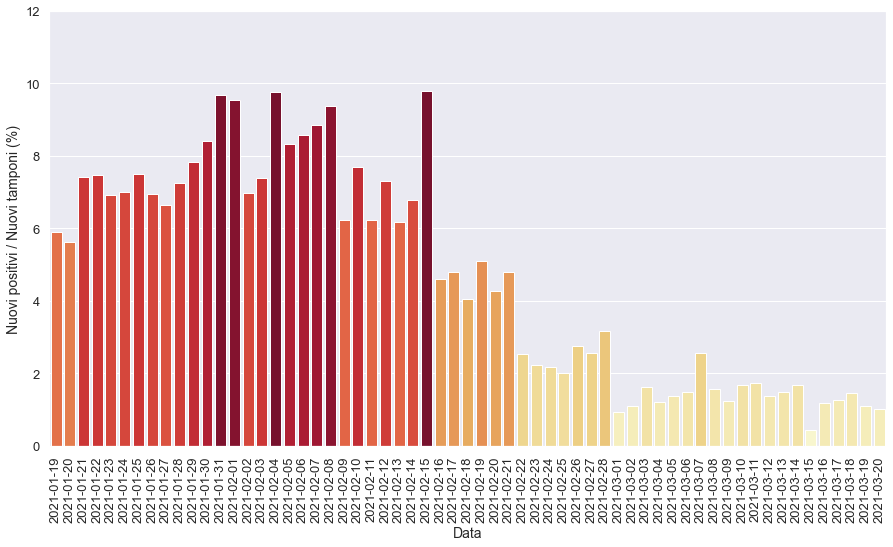

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

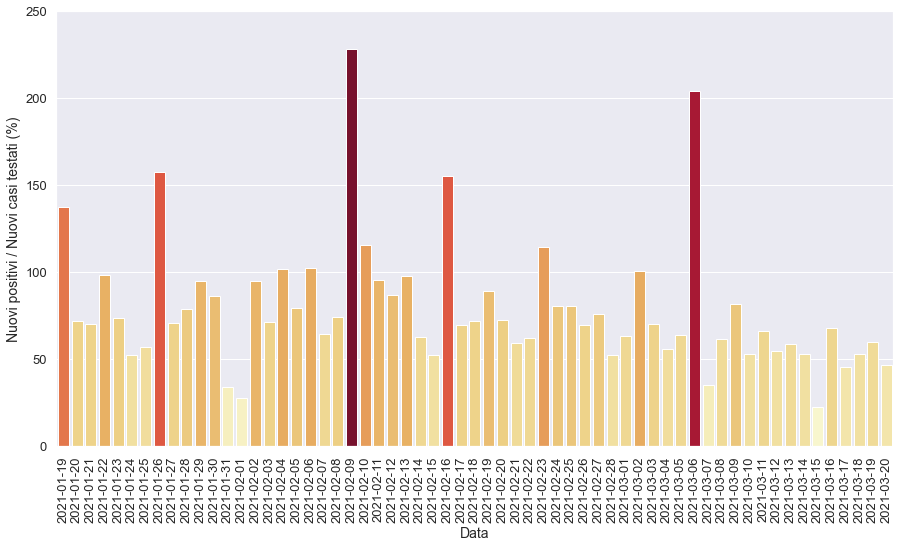

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

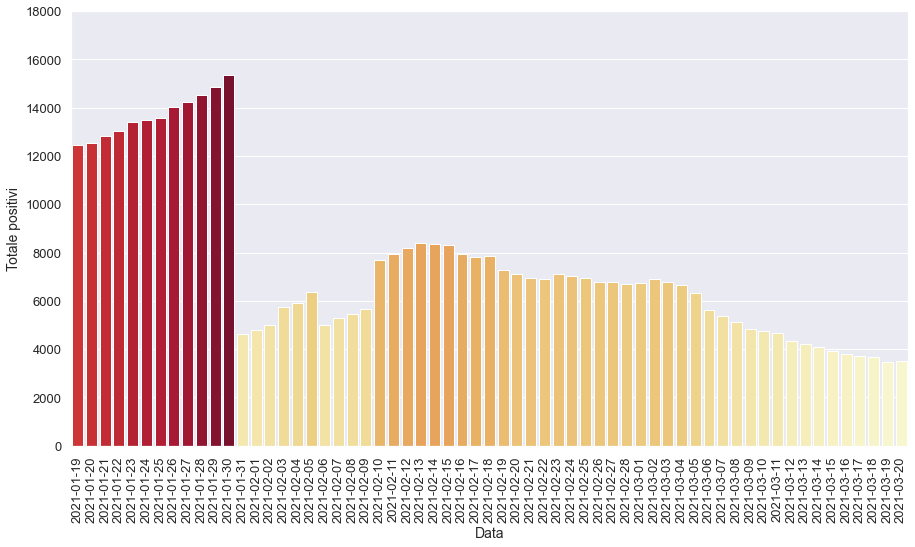

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

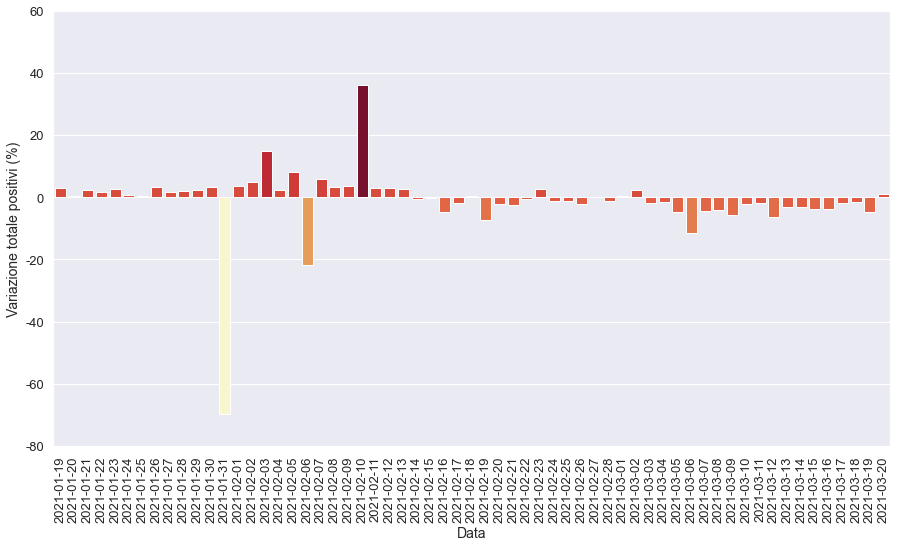

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

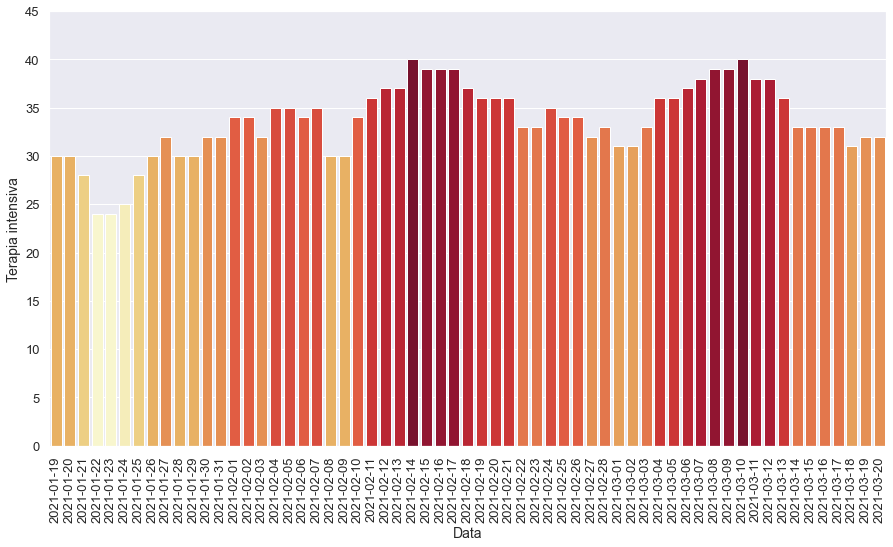

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

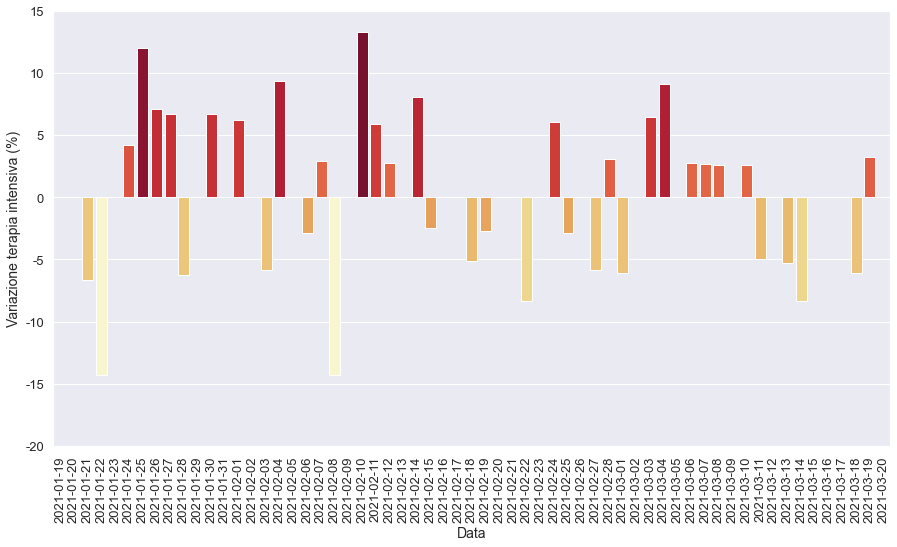

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

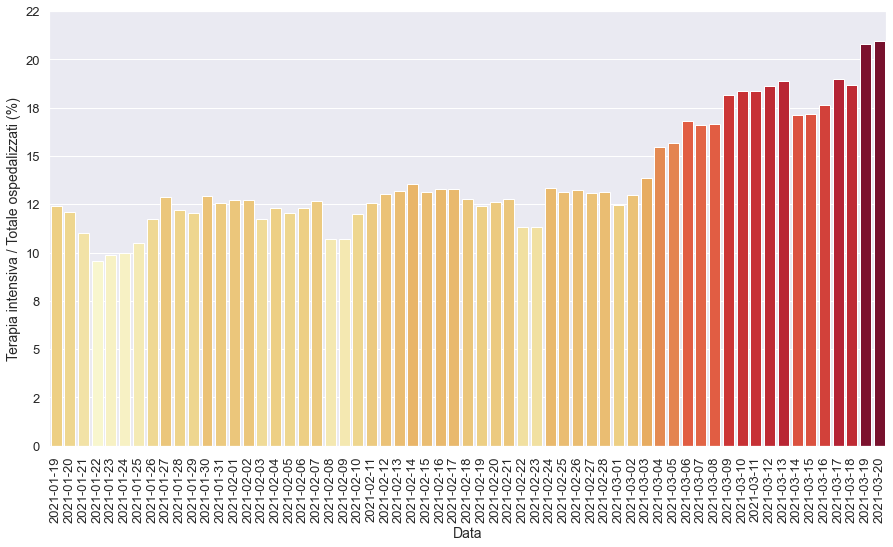

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

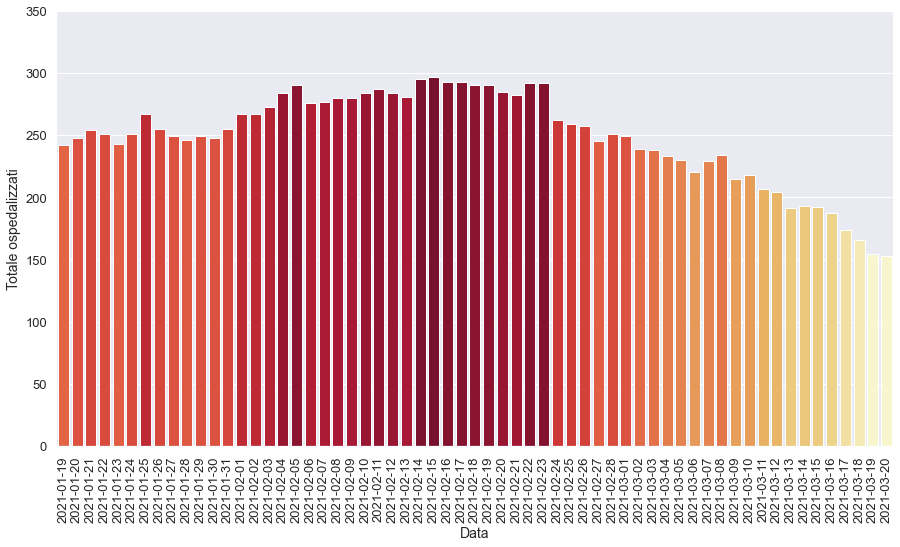

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

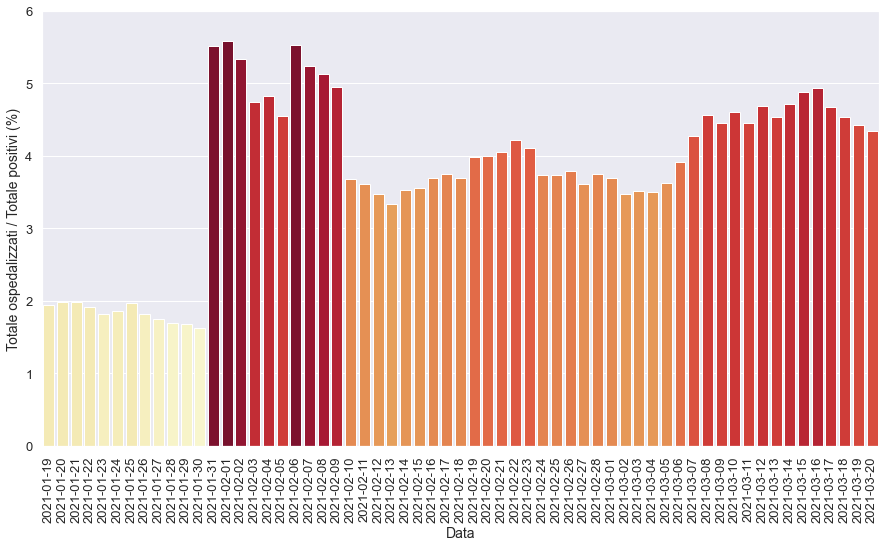

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

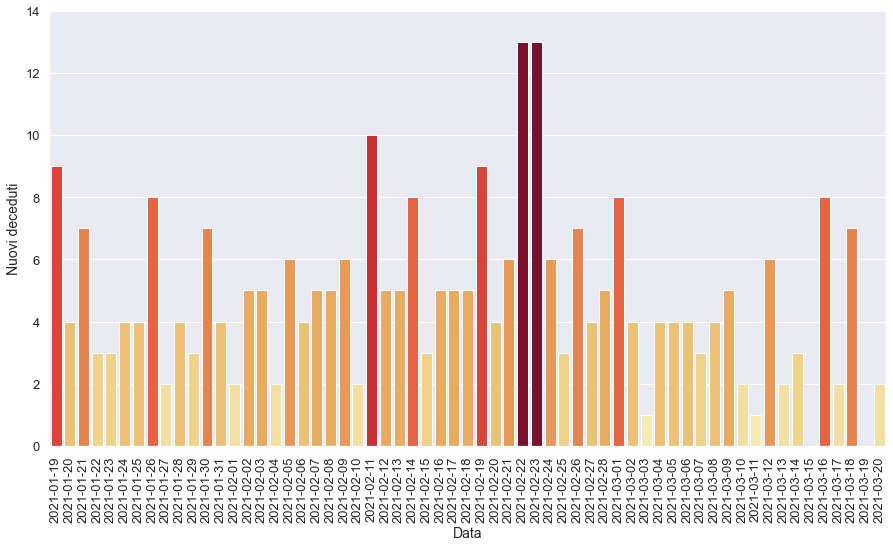

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

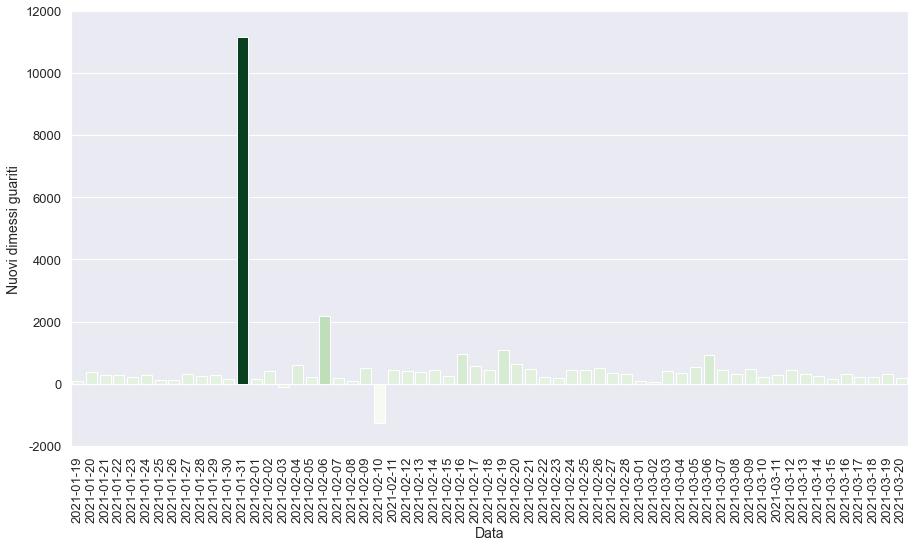

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-18T17:00:00,21,P.A. Bolzano,253,37,290,7563,7853,41,478,...,5.0,11832.0,668.0,44.0,12.76,3.69,4.04,71.56,-5.13,0.52
1,2021-02-19T17:00:00,21,P.A. Bolzano,254,36,290,6988,7278,-575,524,...,9.0,10246.0,587.0,-575.0,12.41,3.98,5.11,89.27,-2.70,-7.32
2,2021-02-20T17:00:00,21,P.A. Bolzano,249,36,285,6846,7131,-147,477,...,4.0,11195.0,660.0,-142.0,12.63,4.00,4.26,72.27,0.00,-2.02
3,2021-02-21T17:00:00,21,P.A. Bolzano,246,36,282,6677,6959,-172,313,...,6.0,6530.0,528.0,-169.0,12.77,4.05,4.79,59.28,0.00,-2.41
4,2021-02-22T17:00:00,21,P.A. Bolzano,259,33,292,6632,6924,-35,183,...,13.0,7231.0,295.0,-45.0,11.30,4.22,2.53,62.03,-8.33,-0.50
5,2021-02-23T17:00:00,21,P.A. Bolzano,259,33,292,6814,7106,182,374,...,13.0,16870.0,328.0,182.0,11.30,4.11,2.22,114.02,0.00,2.63
6,2021-02-24T17:00:00,21,P.A. Bolzano,227,35,262,6749,7011,-95,355,...,6.0,16387.0,441.0,-65.0,13.36,3.74,2.17,80.50,6.06,-1.34
7,2021-02-25T17:00:00,21,P.A. Bolzano,225,34,259,6670,6929,-82,355,...,3.0,17777.0,443.0,-79.0,13.13,3.74,2.00,80.14,-2.86,-1.17
8,2021-02-26T17:00:00,21,P.A. Bolzano,223,34,257,6518,6775,-154,350,...,7.0,12745.0,502.0,-152.0,13.23,3.79,2.75,69.72,0.00,-2.22
9,2021-02-27T17:00:00,21,P.A. Bolzano,213,32,245,6539,6784,9,371,...,4.0,14425.0,490.0,21.0,13.06,3.61,2.57,75.71,-5.88,0.13


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

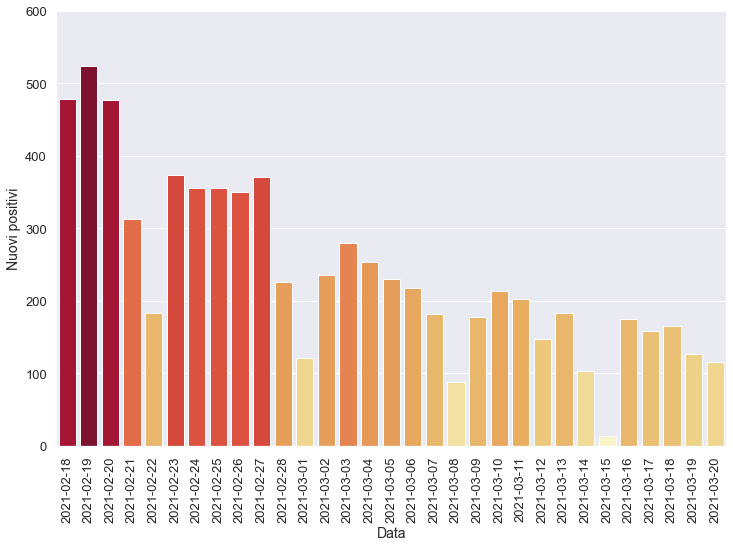

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

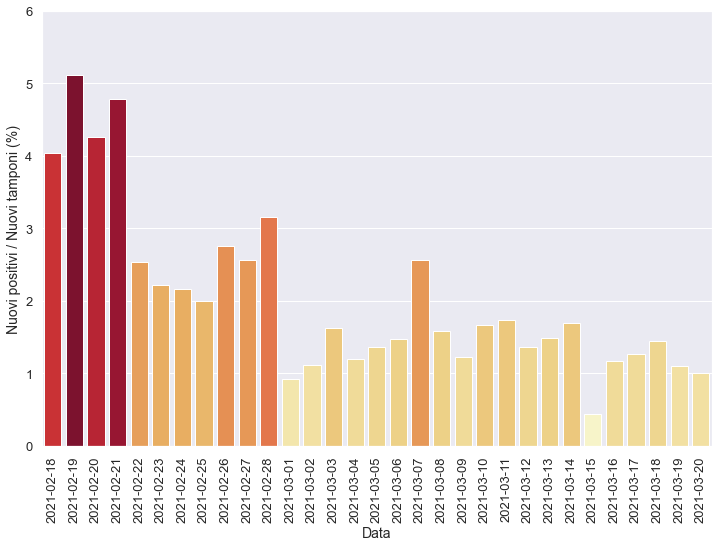

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

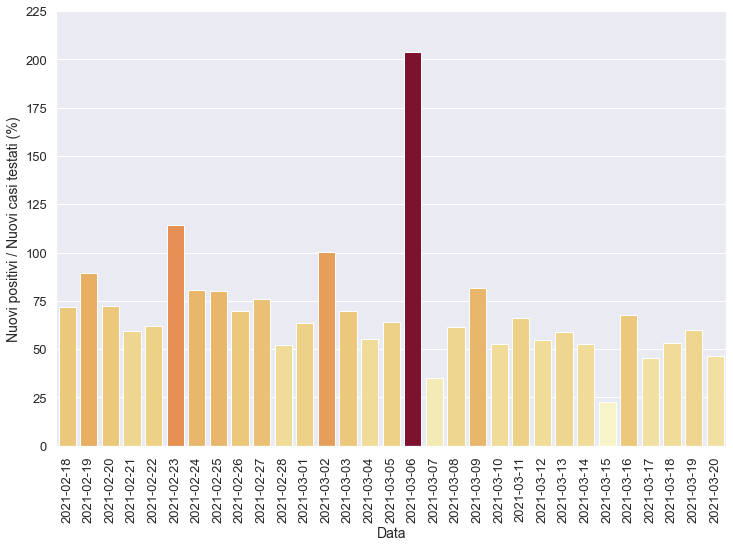

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

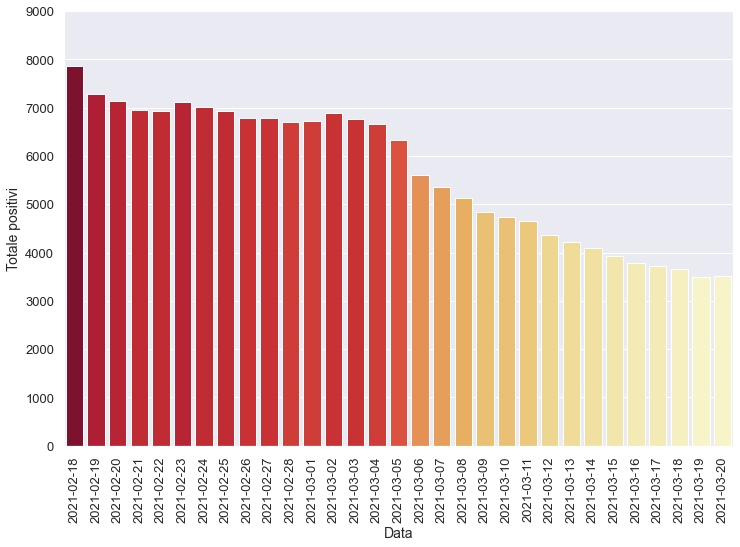

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

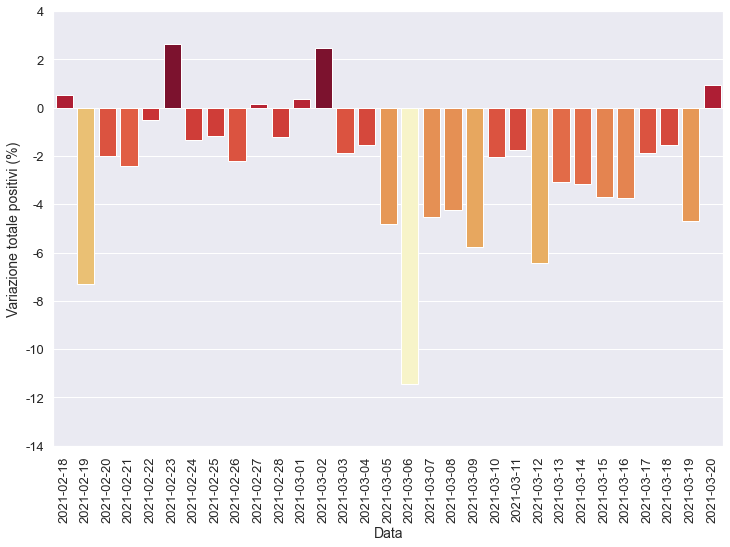

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

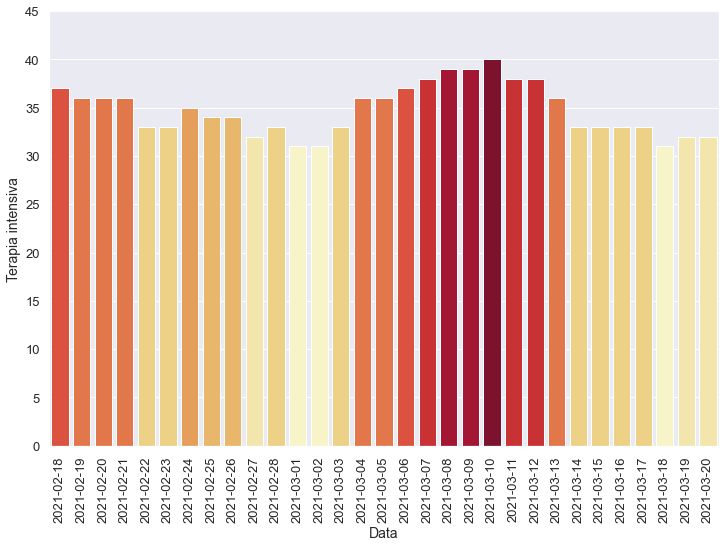

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

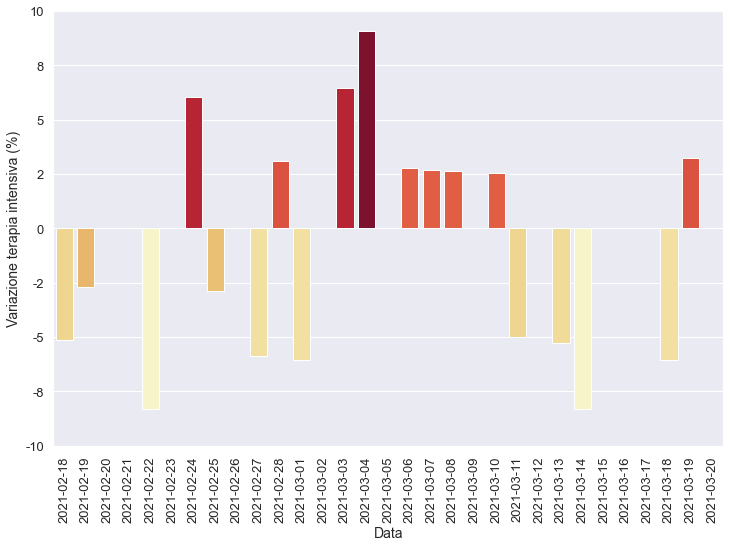

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

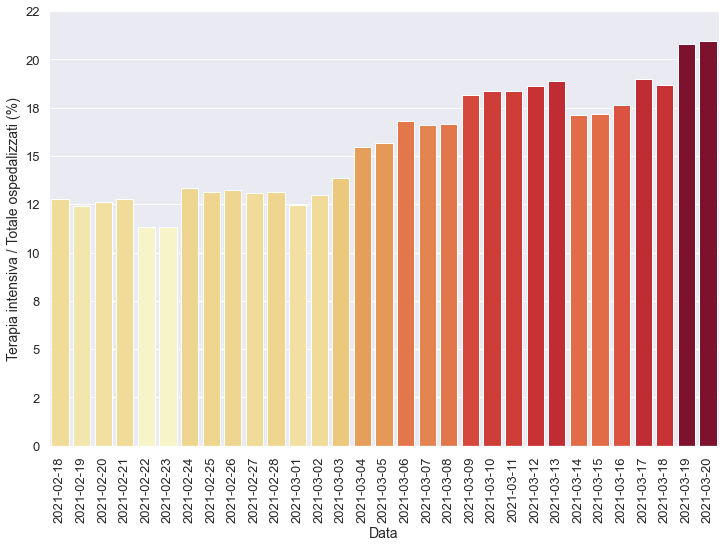

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

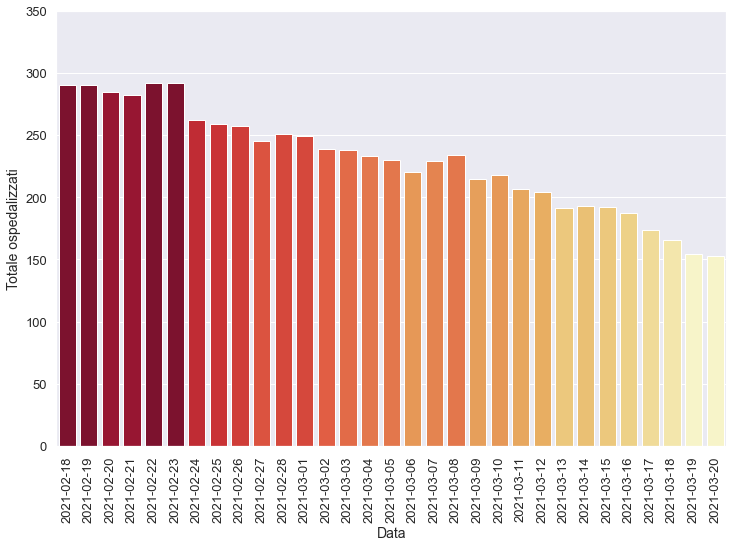

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

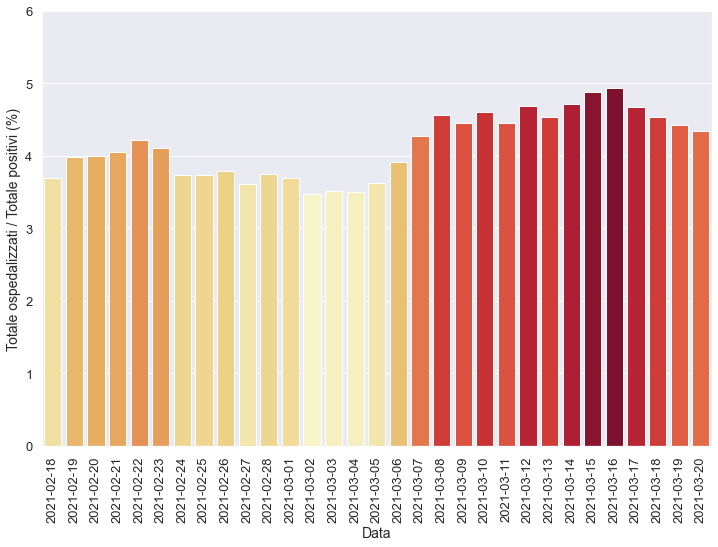

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

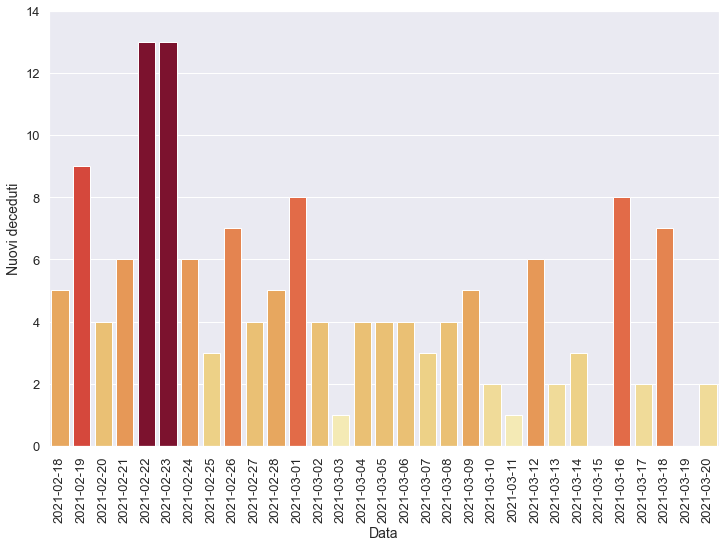

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

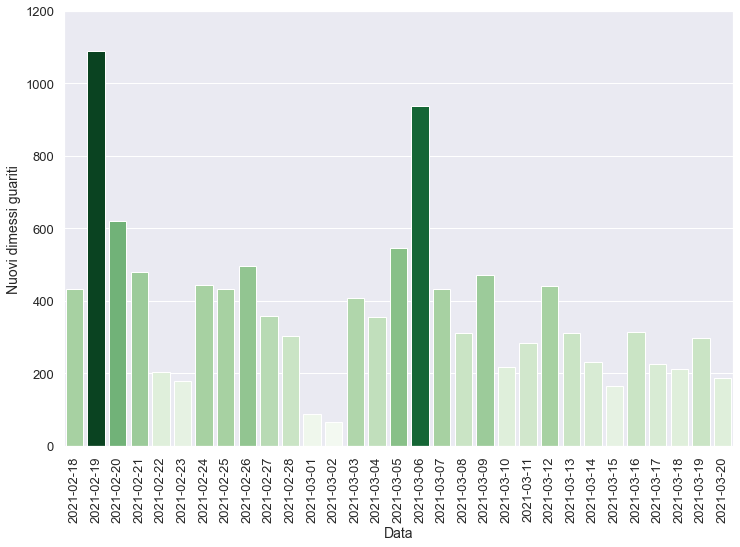

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-13T17:00:00,21,P.A. Bolzano,155,36,191,4028,4219,-134,183,...,2.0,12274.0,312.0,-121.0,18.85,4.53,1.49,58.65,-5.26,-3.08
1,2021-03-14T17:00:00,21,P.A. Bolzano,160,33,193,3892,4085,-134,103,...,3.0,6090.0,196.0,-136.0,17.10,4.72,1.69,52.55,-8.33,-3.18
2,2021-03-15T17:00:00,21,P.A. Bolzano,159,33,192,3741,3933,-152,13,...,0.0,2983.0,58.0,-151.0,17.19,4.88,0.44,22.41,0.00,-3.72
3,2021-03-16T17:00:00,21,P.A. Bolzano,154,33,187,3599,3786,-147,175,...,8.0,14967.0,258.0,-142.0,17.65,4.94,1.17,67.83,0.00,-3.74
4,2021-03-17T17:00:00,21,P.A. Bolzano,141,33,174,3540,3714,-72,158,...,2.0,12433.0,347.0,-59.0,18.97,4.68,1.27,45.53,0.00,-1.90
5,2021-03-18T17:00:00,21,P.A. Bolzano,135,31,166,3491,3657,-57,165,...,7.0,11355.0,311.0,-49.0,18.67,4.54,1.45,53.05,-6.06,-1.53
6,2021-03-19T17:00:00,21,P.A. Bolzano,122,32,154,3331,3485,-172,127,...,0.0,11582.0,212.0,-160.0,20.78,4.42,1.10,59.91,3.23,-4.70
7,2021-03-20T17:00:00,21,P.A. Bolzano,121,32,153,3364,3517,32,116,...,2.0,11452.0,251.0,33.0,20.92,4.35,1.01,46.22,0.00,0.92


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

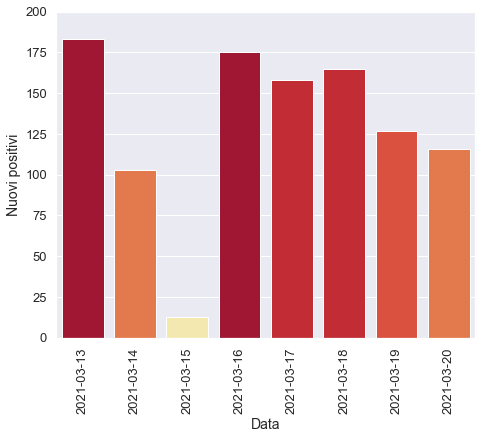

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

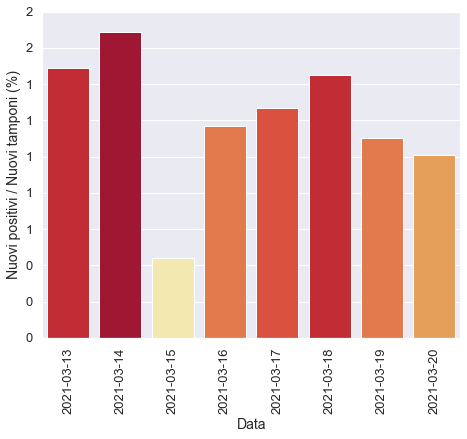

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

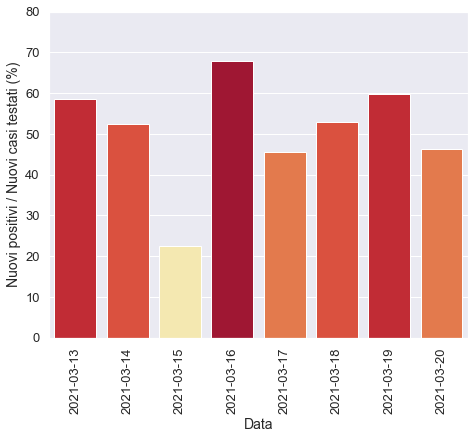

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

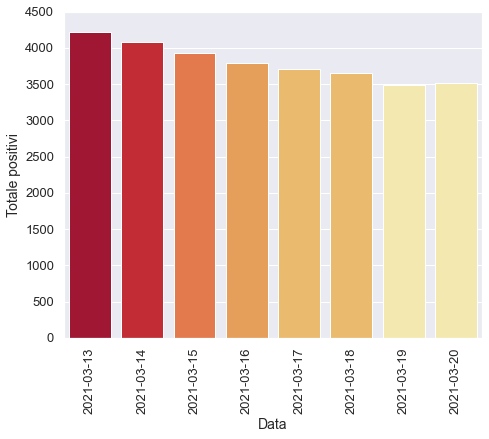

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

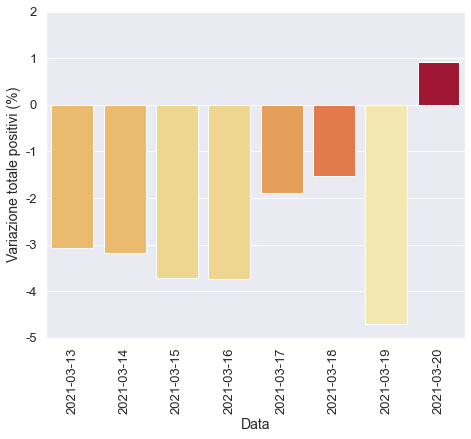

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

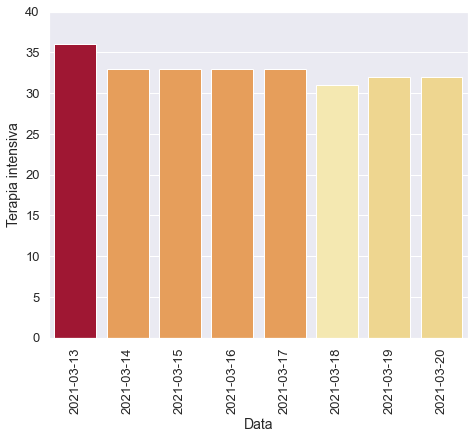

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

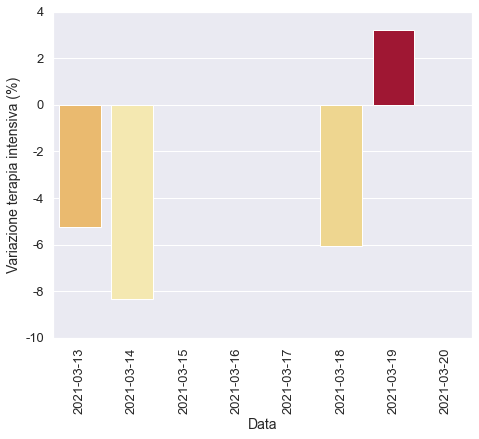

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

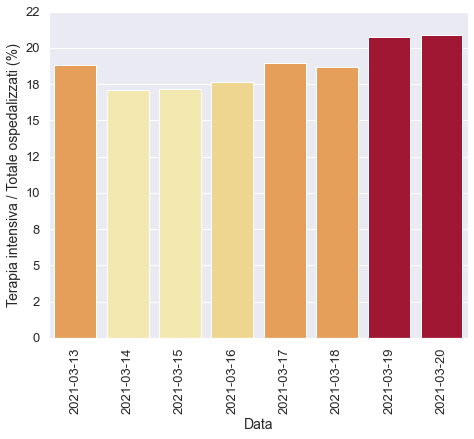

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

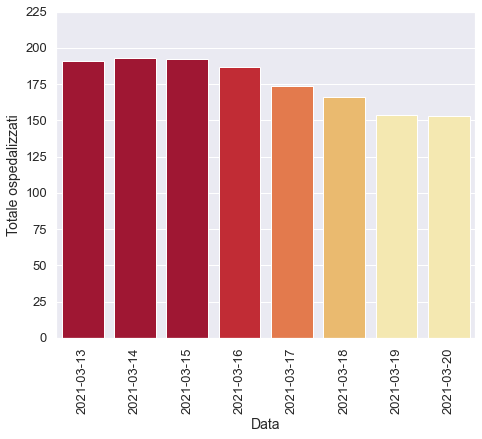

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

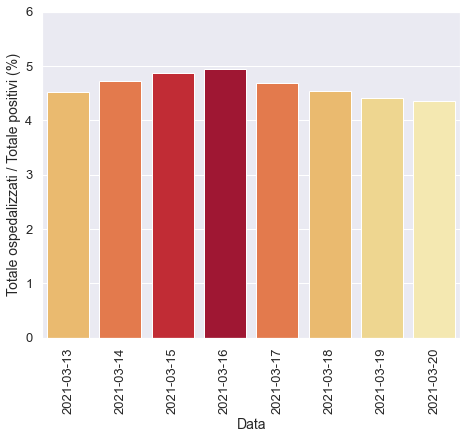

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

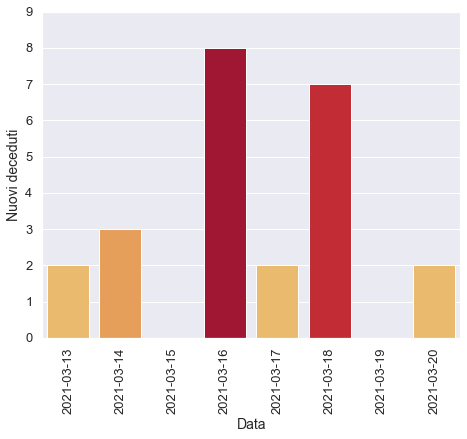

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

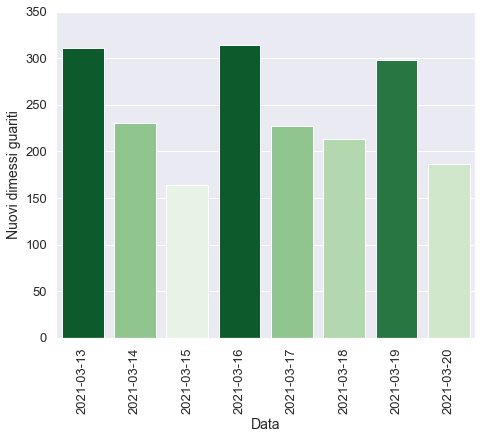

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)